<h1 align='center'> CS353 Machine Learning Lab</h1>
<h1 align='center'>16/03/21</h1>
<h2 align='center'>Keerti Chaudhary (181CO226)</h2>

<h2>Loading Libraries and Dataset

In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline
digits= load_digits()

<h2>Data Analysis

In [ ]:
print("image data shape",digits.data.shape)
print("Label data shape",digits.target.shape)

image data shape (1797, 64)
Label data shape (1797,)


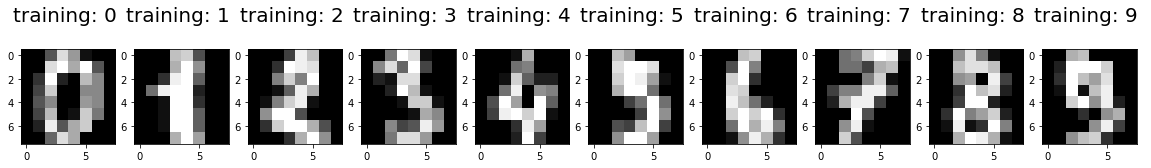

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:10],digits.target[0:10])):
    plt.subplot(1,10,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('training: %i \n' %label,fontsize=20)

<h2>Splitting dataset into testing and training data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(digits.data,digits.target,test_size=0.23,random_state=2)

In [ ]:
print(x_train.shape)

(1383, 64)


In [ ]:
print(y_train.shape)


(1383,)


In [ ]:
print(x_test.shape)

(414, 64)


In [ ]:
print(y_test.shape)

(414,)


<h2>Importing Support Vector Classifier and fitting training dataset

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

<h2>Predicting Test Results

In [ ]:
print(classifier.predict(x_test[0].reshape(1,-1)))

[4]


In [ ]:
classifier.predict(x_test[0:10])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6])

In [ ]:
predictions = classifier.predict(x_test)

In [ ]:
score =classifier.score(x_test,y_test)
print(score)

0.9734299516908212


<h2> Evaluation of SVM Model

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

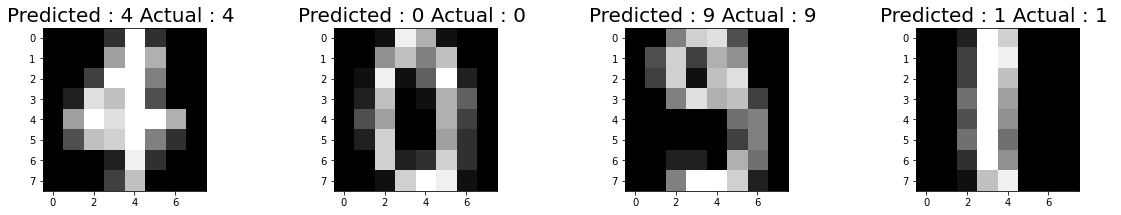

In [ ]:
index= 0
classifiedIndex=[]
for predict, actual in zip(predictions,y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index+=1
plt.figure(figsize=(20,3))
for plotIndex,wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title("Predicted : {} Actual : {} ".format(predictions[wrong],y_test[wrong]),fontsize=20)

<h2>Confusion Matrix

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions)
print(cm)

[[38  0  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 42  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  0  3  0]
 [ 0  0  0  0  0 46  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 46  0  0]
 [ 0  1  0  0  0  0  0  0 35  2]
 [ 0  0  0  1  0  1  0  1  0 31]]


<h2>HeatMap

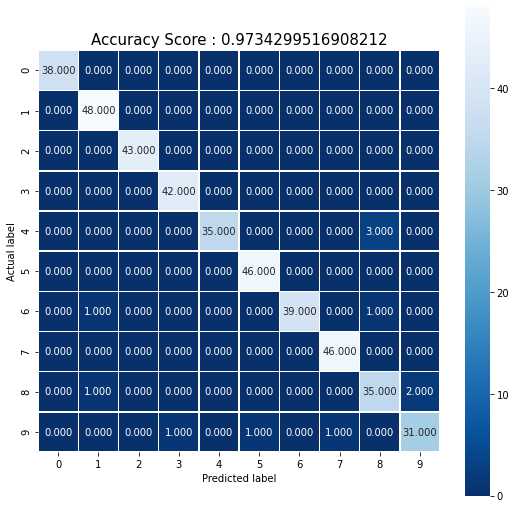

In [ ]:

plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidth=.5,square=True,cmap='Blues_r')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title= 'Accuracy Score : {0}'.format(score)
plt.title(all_sample_title,size=15);

<h2>Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       0.96      1.00      0.98        48
           2       1.00      1.00      1.00        43
           3       0.98      1.00      0.99        42
           4       1.00      0.92      0.96        38
           5       0.98      1.00      0.99        46
           6       1.00      0.95      0.97        41
           7       0.98      1.00      0.99        46
           8       0.90      0.92      0.91        38
           9       0.94      0.91      0.93        34

    accuracy                           0.97       414
   macro avg       0.97      0.97      0.97       414
weighted avg       0.97      0.97      0.97       414

